Task 1:



In [117]:
import os
import numpy as np
from PIL import Image
import time
import matplotlib.pyplot as plt
import csv

In [118]:
"""
VISUALIZATION CODE
"""

def plot_discriminating_function(f, data_variable, data_constant, plot_range=None):
    # Create a meshgrid
    if plot_range is None:
        plot_range = [[0,1],[0,1]]
    x = np.linspace(*plot_range[0], 400)
    y = np.linspace(*plot_range[1], 400)

    X, Y = np.meshgrid(x, y)

    X_flat = X.flatten()
    Y_flat = Y.flatten()
    data = np.zeros((len(X_flat), len(data_constant)))
    for i in range(len(data_constant)):
        data[:, i] = data_constant[i]
    data[:, data_variable[0]] = X_flat
    data[:, data_variable[1]] = Y_flat

    Z = f(data)
    Z = Z.reshape(X.shape)

    plt.contourf(X, Y, Z, levels=[-10000, 0], colors=[(0.8, 0.2, 0.2, 0.36)])  # red fill for 5
    plt.contourf(X, Y, Z, levels=[0, 10000], colors=[(0.3, 0.3, 0.6, 0.36)])  # blue fill for 1

def plot_points(x, y):
    colors = ['blue' if value == 1 else 'red' for value in y]
    plt.scatter(x[:, 0], x[:, 1], color=colors, marker='x', s = 1)

In [119]:
"""
MAIN PIPELINE 1

import as numpy arrays
"""

def import_CSV(file_path):
    data = []
    label = []
    with open(file_path, 'r') as csvfile:
        csvreader = csv.reader(csvfile)

        # skip first row because it has labels
        next(csvreader)

        for row in csvreader:
            data.append(row[1:5])
            label.append(row[5])

    print(f'{data}\n{label}')
    # Convert the list to a numpy array
    data_array = np.array(data)
    bias = np.ones((len(data_array), 1))
    data_array = np.hstack((bias, data_array))
    data_array = data_array.astype(np.float32)
    label = [-1 if x == 'sun' else 1 for x in label]
    label_array = np.array(label)
    label_array = np.reshape(label_array, (len(label_array), 1))

    print(f'label statistics: class -1 {np.sum(label_array == -1)}, class 1 {np.sum(label_array == 1)}')

    return data_array, label_array
    



In [120]:
"""
MAIN PIPELINE LEARNING: LOGISTIC REGRESSION

all the functions for computing the logistic regression.
"""

def sigmoid(x):
    e = 1e-6
    return np.clip(1/(1 + np.exp(-x)), e, 1 - e)

def logistic_loss(x, y, w):
    h = sigmoid(x @ w)
    return (-1 / len(x)) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))

def logistic_optimize(x, y, a, iters=10000):
    m, n = x.shape
    w = np.random.randn(n, 1)
    print_interval = int(iters/10)
    cost_history = np.zeros((int(iters/print_interval),))

    last_printed = -1

    for i in range(iters):
        if i % print_interval == 0:
            print(f'iteration {i} / {iters}')
            incorrect = np.sum(test(x, y, w))
            print(f'accuracy: {(len(x) - incorrect) / len(x)}')

        gradient = (1/m) * x.T @ (sigmoid(x @ w) - y)
        w -= a * gradient
        if i % print_interval == 0:
            last_printed += 1
            a *= 0.8
            cost_history[last_printed] = (logistic_loss(x, y, w))

    return np.reshape(w, (n,)), cost_history

def logistic_sto_optimize(x, y, a, epoch=100):
    m, n = x.shape
    w = np.random.randn(n, 1)
    x_reshaped = np.reshape(x, (m, n, 1))
    print_interval = int(epoch/10)
    cost_history = np.zeros((10,))

    last_printed = -1

    for e in range(epoch):
        if e % print_interval == 0:
            print(f'epoch {e} / {epoch}')
        for i in range(len(x_reshaped)):
            xi = x_reshaped[i, :]
            yi = y[i]
            #print(f'x shape: {xi.shape} y shape: {yi.shape} w shape: {w.shape}')
            gradient = (sigmoid(xi.T @ w) - yi) * xi
            w -= a * gradient
        if e % print_interval == 0:
            last_printed += 1
            a *= 0.8
            cost_history[last_printed] = (logistic_loss(x, y, w))

    return np.reshape(w, (n,)), cost_history

def evaluate(data, w):
    results = np.sign(np.matmul(data, w))
    return results

def get_f(w):
    return lambda x: evaluate(x, w)

def test(x, y, w):
    results = np.sign(np.matmul(x, w))
    stacked = np.column_stack((y, results))
    comparison =  np.abs(0.5 * (stacked[:, 0] - stacked[:, 1]))
    return comparison

[['0.0', '12.8', '5.0', '4.7'], ['10.9', '10.6', '2.8', '4.5'], ['0.8', '11.7', '7.2', '2.3'], ['20.3', '12.2', '5.6', '4.7'], ['1.3', '8.9', '2.8', '6.1'], ['2.5', '4.4', '2.2', '2.2'], ['0.0', '7.2', '2.8', '2.3'], ['0.0', '10.0', '2.8', '2.0'], ['4.3', '9.4', '5.0', '3.4'], ['1.0', '6.1', '0.6', '3.4'], ['0.0', '6.1', '-1.1', '5.1'], ['0.0', '6.1', '-1.7', '1.9'], ['0.0', '5.0', '-2.8', '1.3'], ['4.1', '4.4', '0.6', '5.3'], ['5.3', '1.1', '-3.3', '3.2'], ['2.5', '1.7', '-2.8', '5.0'], ['8.1', '3.3', '0.0', '5.6'], ['19.8', '0.0', '-2.8', '5.0'], ['15.2', '-1.1', '-2.8', '1.6'], ['13.5', '7.2', '-1.1', '2.3'], ['3.0', '8.3', '3.3', '8.2'], ['6.1', '6.7', '2.2', '4.8'], ['0.0', '8.3', '1.1', '3.6'], ['8.6', '10.0', '2.2', '5.1'], ['8.1', '8.9', '4.4', '5.4'], ['4.8', '8.9', '1.1', '4.8'], ['0.0', '6.7', '-2.2', '1.4'], ['0.0', '6.7', '0.6', '2.2'], ['27.7', '9.4', '3.9', '4.5'], ['3.6', '8.3', '6.1', '5.1'], ['1.8', '9.4', '6.1', '3.9'], ['13.5', '8.9', '3.3', '2.7'], ['0.0', '8.3', '

C:\Users\eggyr\AppData\Local\Temp\ipykernel_24840\711353764.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_history[last_printed] = (logistic_loss(x, y, w))
C:\Users\eggyr\AppData\Local\Temp\ipykernel_24840\711353764.py:9: RuntimeWarning: overflow encountered in exp
  return np.clip(1/(1 + np.exp(-x)), e, 1 - e)


iteration 2000 / 10000
accuracy: 0.5078713210130048
iteration 3000 / 10000
accuracy: 0.5078713210130048
iteration 4000 / 10000
accuracy: 0.5078713210130048
iteration 5000 / 10000
accuracy: 0.5078713210130048
iteration 6000 / 10000
accuracy: 0.5078713210130048
iteration 7000 / 10000
accuracy: 0.5078713210130048
iteration 8000 / 10000
accuracy: 0.5078713210130048
iteration 9000 / 10000
accuracy: 0.5078713210130048


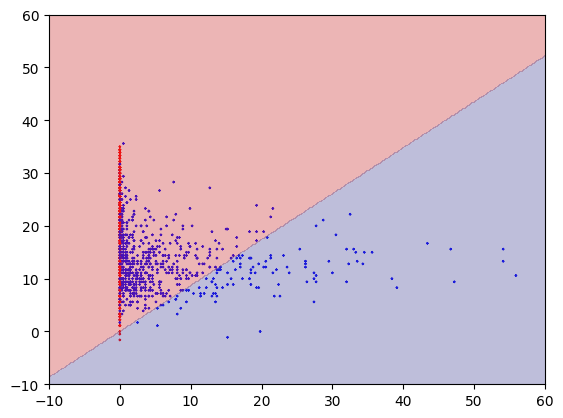

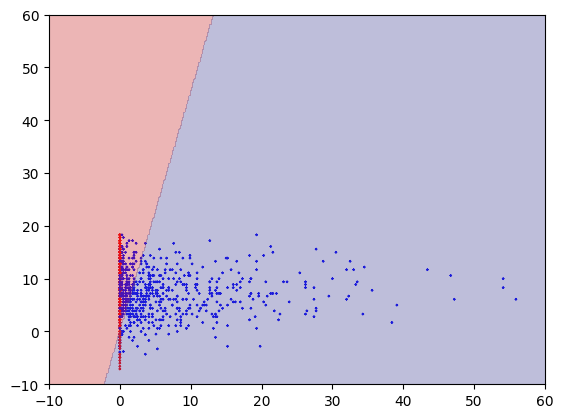

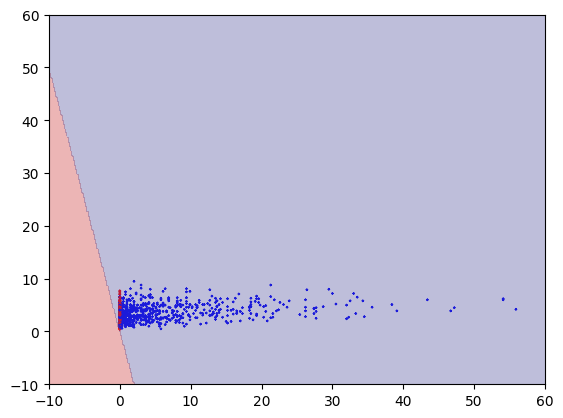

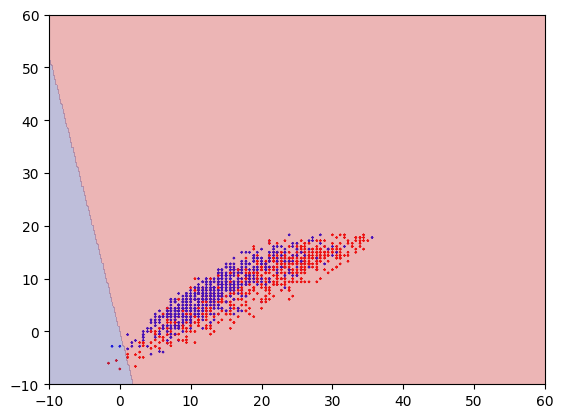

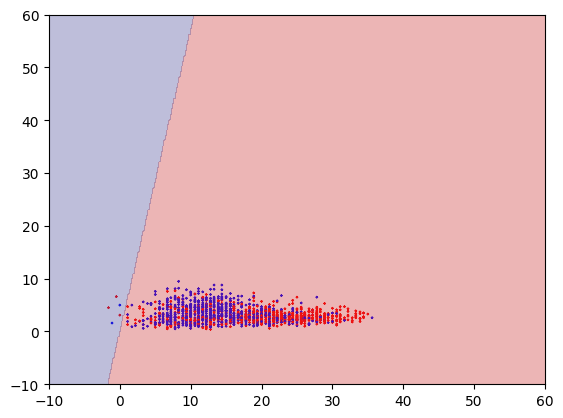

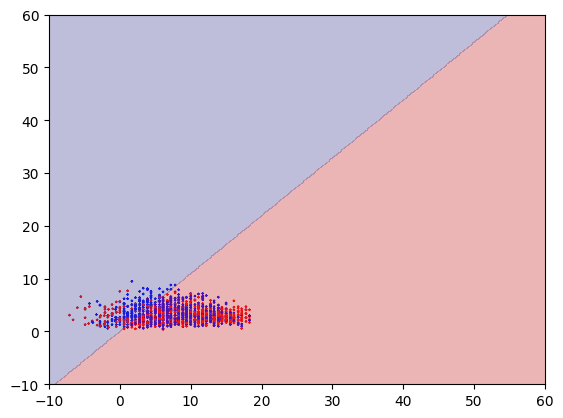

array([1., 1., 1., ..., 1., 0., 0.])

In [121]:
"""
RUNNER
"""

data_dir = '../../Data/seattle-weather.csv'

X, Y = import_CSV(data_dir)
print(f'X shape: {X.shape}\n {X}Y Shape: {Y.shape}\n{Y}')

weights, costs = logistic_optimize(X, Y, 0.1, 10000)

offset = [0,0,0,0,0]

plot_points(X[:, [1, 2]], Y)
plot_discriminating_function(get_f(weights), [1,2], offset, [[-10,60], [-10, 60]])
plt.show()

plot_points(X[:, [1, 3]], Y)
plot_discriminating_function(get_f(weights), [1,3], offset, [[-10,60], [-10, 60]])
plt.show()

plot_points(X[:, [1, 4]], Y)
plot_discriminating_function(get_f(weights), [1,4], offset, [[-10,60], [-10, 60]])
plt.show()

plot_points(X[:, [2, 3]], Y)
plot_discriminating_function(get_f(weights), [2,3], offset, [[-10,60], [-10, 60]])
plt.show()

plot_points(X[:, [2, 4]], Y)
plot_discriminating_function(get_f(weights), [2,4], offset, [[-10,60], [-10, 60]])
plt.show()

plot_points(X[:, [3, 4]], Y)
plot_discriminating_function(get_f(weights), [3,4], offset, [[-10,60], [-10, 60]])
plt.show()

test(X, Y, weights)


